In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def structure_MHC(filename, separator=','):
    ''' 
    Takes a cleaned up netCTLpan file as input.
    The default separator is a ',' (comma).
    The function returns a cleaned up pandas dataframe.
    '''
    headers = ['Index in protein' ,'Protein', 'Allele', 'Peptide', 'MHC score', 'TAP score', 'Cle score', 'Comb score', 'Rank', 'sign']
    df = pd.read_csv(filename, sep=separator, 
                     header = 0, 
                     names=headers)
    df.reset_index(drop=True, inplace=True)
    new = df['Protein'] = df['Protein'].str.split('|', expand=True) # Splits the protein column in 3 new columns
    df['sp'] = new[0]
    df['Uniprot ID'] = new[1] # Uniprot ID of proteins from which the peptides originate
    df['Protein name'] = new[2] # Canonical name of proteins from which the peptides originate
    df.drop(columns=['Protein', 'sp'], inplace=True)
    return df

df = structure_MHC('C:/Users/sebas/Desktop/School/Ma 2/Stage/Internship/code/MHC_clean.txt')

protein_1 = df['Uniprot ID']=='Q8N1N5'
df_Q8N1N5 = df[protein_1]

In [104]:
df

,Index in protein,Allele,Peptide,MHC score,TAP score,Cle score,Comb score,Rank,sign,Uniprot ID,Protein name
0,1.0,HLA-A*01:02,HEPSLCANV,0.029,0.109,0.93808,0.24279,32.0,NaN,Q8N1N5,CRPAK
1,2.0,HLA-A*01:02,EPSLCANVE,0.013,-2.101,0.07052,-0.02366,50.0,NaN,Q8N1N5,CRPAK
2,3.0,HLA-A*01:02,PSLCANVEC,0.036,-0.574,0.03031,0.02847,50.0,NaN,Q8N1N5,CRPAK
3,4.0,HLA-A*01:02,SLCANVECP,0.016,0.041,0.02673,0.02304,50.0,NaN,Q8N1N5,CRPAK
4,5.0,HLA-A*01:02,LCANVECPP,0.019,0.200,0.03149,0.03109,50.0,NaN,Q8N1N5,CRPAK
...,...,...,...,...,...,...,...,...,...,...,...
28635,459.0,HLA-A*01:07,NSDGVNEKV,0.238,0.077,0.95331,0.45442,2.0,NaN,P28223,5HT2A
28636,460.0,HLA-A*01:07,SDGVNEKVS,0.009,-2.522,0.06481,-0.03947,50.0,NaN,P28223,5HT2A
28637,461.0,HLA-A*01:07,DGVNEKVSC,0.006,-0.436,0.03955,0.00400,50.0,NaN,P28223,5HT2A
28638,462.0,HLA-A*01:07,GVNEKVSCV,0.053,0.041,0.91943,0.26090,16.0,NaN,P28223,5HT2A


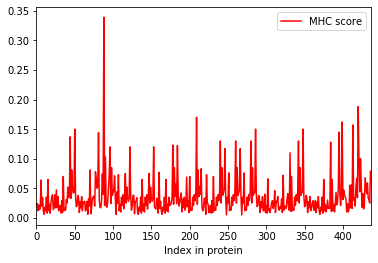

In [7]:
test = df_Q8N1N5['Allele']=='HLA-A*01:01' # makes a column with True and False
HLA_A_01_01 = df_Q8N1N5[test] # dataframe filtered for HLA-A*01:01

x = HLA_A_01_01['Index in protein']
y = HLA_A_01_01['Rank']

HLA_A_01_01.plot(kind='line', x='Index in protein', y='MHC score', color='r') # 'Immunogenicity' plot (~cfr. hydrophobicity plot)

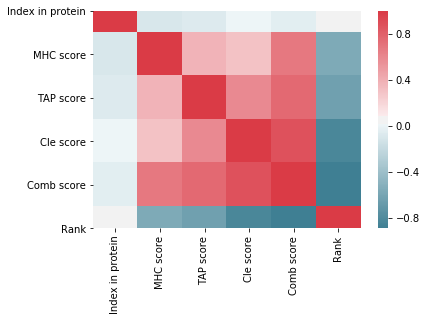

In [15]:
from matplotlib.ticker import AutoMinorLocator

corr = df.loc[:, df.dtypes=='float64'].corr() # correlation scores for all float values in 'df'

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True)) # plot a heatmap of the correlations

[Text(0, 0, 'Q9NYF8'),
 Text(0, 0, 'Q04771'),
 Text(0, 0, 'Q14032'),
 Text(0, 0, 'Q15059'),
 Text(0, 0, 'P32320'),
 Text(0, 0, 'P28223')]

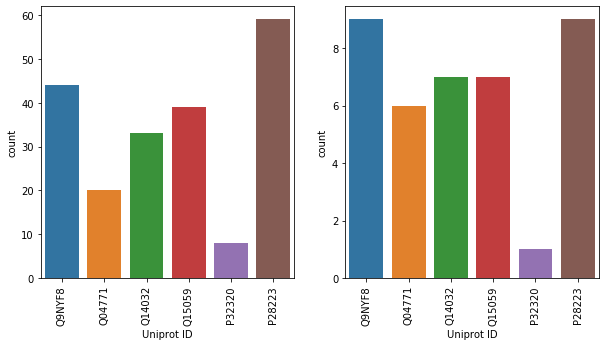

In [103]:
sign = df['sign']=='<-E'
hrank = df[sign] # filters for entries with E

filtertest = hrank.drop_duplicates(subset='Peptide')
filtertest

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

a = sns.countplot(x='Uniprot ID', data=hrank, ax=ax1)
b = sns.countplot(x='Uniprot ID', data=filtertest, ax=ax2)

a.set_xticklabels(a.get_xticklabels(), rotation=90)
b.set_xticklabels(b.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'MHC scores per protein')

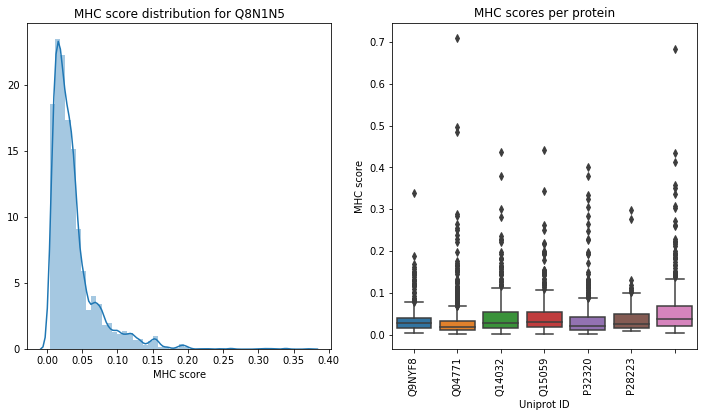

In [162]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12,6)) # initialize 2 plots

chart1 = sns.distplot(df_Q8N1N5['MHC score'], ax=ax1) # 1st plot
chart1.set_title('MHC score distribution for Q8N1N5') # title

HLA_filter = df['Allele']=='HLA-A*01:01' # makes a column with True and False
HLA_A_01_01 = df[HLA_filter] # dataframe filtered for HLA-A*01:01

chart2 = sns.boxplot(x='Uniprot ID', y='MHC score', data=HLA_A_01_01, ax=ax2) # 2nd plot
chart2.set_xticklabels(a.get_xticklabels(), rotation=90) # rotate x-labels 90°
chart2.set_title('MHC scores per protein') # title

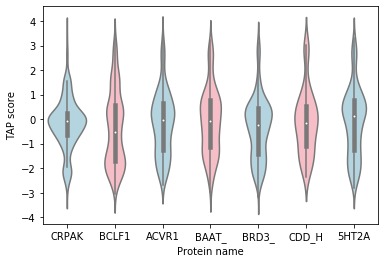

In [173]:
sns.violinplot("Protein name", "TAP score", data=HLA_A_01_01,
               palette=["lightblue", "lightpink"]);

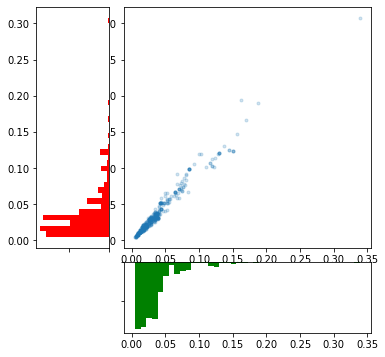

In [129]:
protein_1 = df['Uniprot ID']=='Q8N1N5'
df_Q8N1N5 = df[protein_1]

HLA_A_01_01_T = df_Q8N1N5['Allele']=='HLA-A*01:01'
HLA_A_01_01 = df_Q8N1N5[HLA_A_01_01_T]

HLA_A_01_07_T = df_Q8N1N5['Allele']=='HLA-A*01:07'
HLA_A_01_07 = df_Q8N1N5[HLA_A_01_07_T]

x = HLA_A_01_01['MHC score']
y = HLA_A_01_07['MHC score']

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'o', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='green')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='red')
y_hist.invert_xaxis()

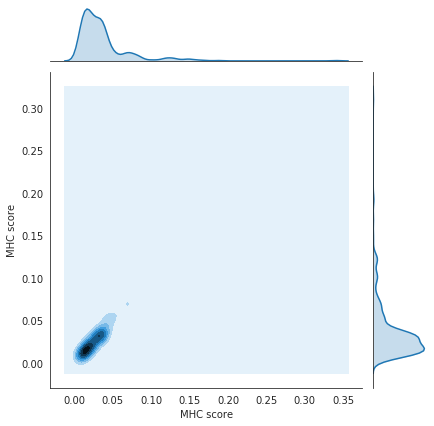

In [151]:
protein_1 = df['Uniprot ID']=='Q8N1N5'
df_Q8N1N5 = df[protein_1]

HLA_A_01_01_T = df_Q8N1N5['Allele']=='HLA-A*01:01'
HLA_A_01_01 = df_Q8N1N5[HLA_A_01_01_T]

HLA_A_01_07_T = df_Q8N1N5['Allele']=='HLA-A*01:07'
HLA_A_01_07 = df_Q8N1N5[HLA_A_01_07_T]

x = HLA_A_01_01['MHC score']
y = HLA_A_01_07['MHC score']

with sns.axes_style('white'):
    sns.jointplot(x, y, data=df_Q8N1N5, kind='kde')